In [36]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pickle
from ramannoodles import spectrafit
from ramannoodles import shoyu

In [2]:
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMIC ACID',
 'WATER']

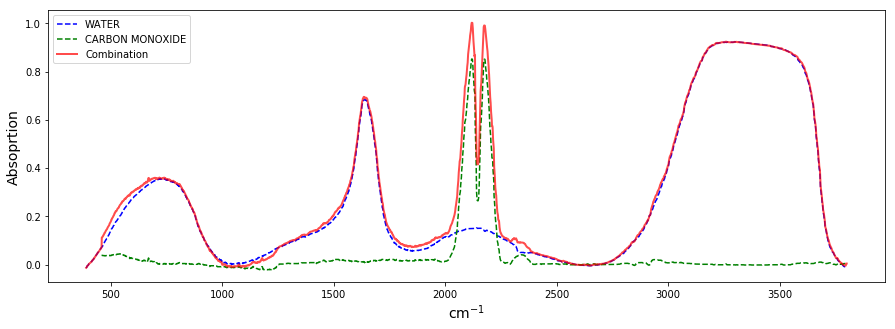

In [75]:
compound_1 = shoyu_data_dict['WATER']
compound_2 = shoyu_data_dict['CARBON MONOXIDE']
compound_3 = shoyu_data_dict['ETHYL ALCOHOL']
compound_4 = shoyu_data_dict['FORMIC ACID']
spectra_x, spectra_y = shoyu.combine_spectra(compound_1, compound_2, plot = True)

In [4]:
spectra_x = np.asarray(spectra_x)
spectra_y = np.asarray(spectra_y)

In [ ]:
water_peaks = spectrafit.compound_report(compound_1)[0]
co_peaks = spectrafit.compound_report(compound_2)[0]
spectra_peaks = spectrafit.data_report(spectra_x, spectra_y)[0]
ethyl_alcohol_peaks = spectrafit.compound_report(compound_3)[0]
formic_acid_peaks = spectrafit.compound_report(compound_4)[0]

In [ ]:
print('Water peaks = {}'.format(water_peaks))
print('CO peaks = {}'.format(co_peaks))
print('Combined Spectra peaks = {}'.format(spectra_peaks))
print('EtOH Spectra peaks = {}'.format(ethyl_alcohol_peaks))
print('formic acid peaks = {}'.format(formic_acid_peaks))

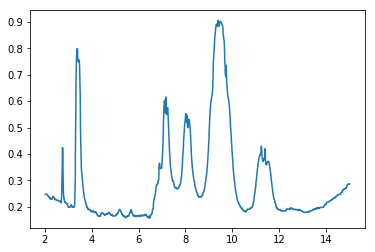

In [74]:
#OK, so the EtOH peaks look very wrong. 
plt.plot(compound_3['x'], compound_3['y'])

In [35]:
#Ok, first things first, let's just compare two and not worry os much. 
water_peaks

[711.4826030832157, 1638.6886199554203, 3312.1231809302135]

# The cell below shows comparison for a single set of peaks (ie, water) against the peaks for the combined spectra. It finds all of them neatly, so that's nice.

In [43]:
#Use this array to keep track of which peaks in spectra_peaks are assigned to what. The position in the array also
#corresponds to the position along spectra_peaks, so it provide positional tracking too. 
soft_assignment_array = np.zeros(len(spectra_peaks))
peaks_found = 0

for i in range(len(spectra_peaks)):
    for j in range(len(water_peaks)):
        print(j)
        if math.isclose(spectra_peaks[i], water_peaks[j], rel_tol = 0.02):
            soft_assignment_array[i] = 1
            peaks_found += 1
            continue
        else:
            pass

    if peaks_found == len(water_peaks):
        continue
    else:
        pass
print(soft_assignment_array)

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
[1. 1. 0. 0. 1.]


In [48]:
#Ok, in order to modularize this, we need to make that above a generalizable function. NBD!
def compare_unknown_to_known(combined_spectrum, known_spectrum, precision = 0.03):
    assignment_matrix = np.zeros(len(combined_spectrum))
    peaks_found = 0
    for i in range(len(combined_spectrum)):
        for j in range(len(known_spectrum)):
            if math.isclose(combined_spectrum[i], known_spectrum[j], rel_tol = precision):
                assignment_matrix[i] = 1
                peaks_found += 1
                continue
            else:
                pass
        if peaks_found == len(known_spectrum):
            continue
        else:
            pass
    return assignment_matrix

In [51]:
water_assignment_matrix = compare_unknown_to_known(spectra_peaks, water_peaks, 0.02)
co_assignment_matrix = compare_unknown_to_known(spectra_peaks, co_peaks, 0.02)
print(water_assignment_matrix)
print(co_assignment_matrix)

[1. 1. 0. 0. 1.]
[0. 0. 1. 1. 0.]


In [65]:
#Alright, now, code functionality that enables assignment of text to peak positions.
unknown_text_assignment = []
for i in range(len(spectra_peaks)):
    position_assignment = []
    if water_assignment_matrix[i] == 1:
        position_assignment.append("WATER")
    if co_assignment_matrix[i] == 1:
        position_assignment.append("CO")
    unknown_text_assignment.append(position_assignment)
print(unknown_text_assignment)

[['WATER'], ['WATER'], ['CO'], ['CO'], ['WATER']]


# Magnificent. Hard-coded to holy hell, but hey! We can assign peaks to have words associated with them. Good stuff

In [68]:
#Ok, let's quickly run a test of something that is not in the combined spectrum and see how it handles it. 
compound_3 = shoyu_data_dict['ETHYL ALCOHOL']
ethyl_alcohol_peaks = spectrafit.compound_report(compound_3)[0]
print(ethyl_alcohol_peaks)

[2.757938608767363, 3.4216112107197514, 7.161978013820123, 8.065277519813382, 9.4628771518764, 15.50571824967875]


TypeError: float() argument must be a string or a number, not 'dict'

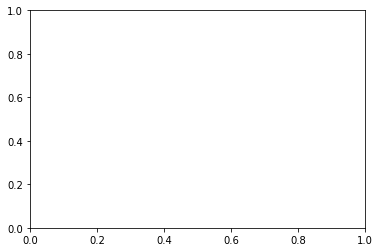

In [69]:
plt.plot(compound_3)

In [ ]:
#Ok, peaks imported. 

In [ ]:
#Lets turn that into a generic function.
#Assume that we have a different wrapper that generates our assignment lists. 
#We will also assume that we know which dictionary entries are associated with which known peaks. This fixes 
#some of the issues with hardcoding in the above section. 
def assign_peak_names(unknown_peaks, known_peaks, precision):
    
    water_assignment_matrix = compare_unknown_to_known(spectra_peaks, water_peaks, 0.02)
    co_assignment_matrix = compare_unknown_to_known(spectra_peaks, co_peaks, 0.02)
    
    unknown_text_assignment = []
    for i in range(len(spectra_peaks)):
        position_assignment = []
        if water_assignment_matrix[i] == 1:
            position_assignment.append("WATER")
        if co_assignment_matrix[i] == 1:
            position_assignment.append("CO")
        unknown_text_assignment.append(position_assignment)
    
    
    return unkown_text_assigment

In [59]:
#Ok, we've got assignments! For now, we won't resolved conflicts. We'll just add both labels to the same peak. 
#If we nest the loops through the water in 
unknown_text_assignment = []
known_compound_name = "WATER"
for i in range(len(water_assignment_matrix)):
    if water_assignment_matrix[i] == 1:
        unknown_text_assignment.append(known_compound_name)
    else:
        unknown_text_assignment.append("Unassigned")
print("Your matrix situation after " + str(known_compound_name) + " peak assignments are: " + str(unknown_text_assignment))

for i in range(len(co_assignment_matrix))

Your matrix situation after WATER peak assignments are: ['WATER', 'WATER', 'Unassigned', 'Unassigned', 'WATER']


In [ ]:
def assign_peaks(unknown_peaks, known_peaks, precision)

In [ ]:
#OK, now that we have the arrays being generated, let's do a weighting function

In [ ]:
#We need some way to compare all of the assignments arrays generated, to see how 

In [ ]:
peak_text_assignments = []
for i in range(len(spectra_peaks)):
    for j in range(compound_1, compound_2, ...):
        
    

In [ ]:
def weighting_assignment_matrix(assignment_matrix, known_spectrum_length, )

In [ ]:
for i in len(spectra_peaks):
    for j in len(water_peaks):
        if math.isclose(spectra_peaks[i], water_peaks[j], 0.01):
            #Some random call that softly assigns peak i as a water peak.     
            lookahead_peak_comparison(i, j, spectra_peaks, water_peaks)


In [ ]:
def lookahead_peak_comparison(i, j, spectra_peaks, water_peaks):
    spectra_peaks_iterator = i + 1
    
    for spectra_peaks_iterator in len(spectra_peaks):
        if math.isclose(spectra_peaks[spectra_peaks_iterator], water_peaks[j], 0.01):
            #Some random call that softly assigns the peak at the current position to be coming from water.
            #Some random call that checks the length of the softly assigned storage spot against the length of water peaks
            #to determin if it has any remaining peaks left. if no, then we have assigned all the peaks to water,
            #and we can remove water. 
            
        
    
    
    

In [8]:
#Next, we'll need to look at the combined spectra peaks and try to ascribe the peaks. 
#I think we'll need to tell it if it sees the water peaks first.
#ie, write the function as though we'll tell it exactly what to look for first. 

#add new column to label what spectra each peak in the analyzed spectra is coming from. I think that means we 
#need to switch over to a pandas dataframe, rather than a numpy array. 


#We could loop through and check each position of the spectra peaks. At each position, we could look through all 
#of the user inputted peaks that are worth comparing(ie, define as a function, and have possible_peaks be an
#array of compounds to take as an input.) At peak position 1, we could look through and say ok, we've got 
#5 compounds in the testing function. Lets compare the peak max at peak position 1 from testing spectra against
#the first peak in every one of the compounds on the test list. If the isclose statement evaluates to true, then
#We will iterate down spectra_peaks and compare that next peak against the second peak in the tested spectra
#If we get through the whole of the spectra_peaks and don't find any more matches, then we know that the tested compound 
#was a no, and we need to 1. ignore it for all future comparisons, and 2. not assign the first peak to be coming from 
#the tested compound. 
#Then, we'll need to keep moving down our inputted list, and comparing each first peak in the inputted list against 
#our first peak. 
#If we can't find a match to the first peak, we then have a statement that assigns the first peak to "Not found!"
#Print out a small error, but then move to the second peak. We might at least be able to define some of the peaks in 
#the spectrum. 


#Strategy, loop through the Combined Spectra Peaks, and compare the first peak. 
for i in len(spectra_peaks):
    for j in len(water_peaks):
        #1% wiggle between the peak maxima. 
        if math.isclose(spectra_peaks[i], water_peaks[i], rel_tol = 0.01):
            #Random function to assign that peak i in spectra peaks is a peak found in water. 
            #Small problem. We're not fully sure that this means that the water peak is def. 
            #the right one. We just know that this first peak is close to water. 
            
        

solicit_user_input(Is peak x close enough to peak y.)
#Alternative would be to report an prediction in terms of a percentage of the fit. That relies on Brandon's work. 

IndentationError: expected an indented block (<ipython-input-8-2fe01ae40c20>, line 36)

In [ ]:
def scan_multicomponent_spectra(spectra_peaks, expected_components, relative_tolerance)
"""
This function is a wrapper that takes in a spectra that is to be analyzed, and a list of potential components, as well as 
a relative tolerance on how close the peak maxima are, and asigns a compound to each of the peaks in the spectra. 
    Function Input Parameters:
        spectra_peaks - numpy array
            This is the set of peaks detected by spectrafit.py that is in need of analysis and autoassignment of peaks.
            I


"""

#where 1 is the y value, 2 is the x, and 3 is the string value of what compound the peak is assigned to.
peak_assignments = spectra_peaks[i][1,2,3]


return peak_assignments